In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.orbit import Orbit
from galpy.df import streamdf
from galpy.util import bovy_plot, bovy_conversion, bovy_coords
import seaborn as sns
import pal5_util
%pylab inline
R0,V0= 8., 220.

Populating the interactive namespace from numpy and matplotlib


# A *galpy* model for Palomar 5 in MWPotential2014

Setup the progenitor orbit and figure out a good actionAngleIsochroneApprox. We'll take the values from Fritz & Kallivayalil, and compare them to their stream positions and to the Kuzma et al. radial velocities. Provided we put Pal 5 at the maximum possible distance, this fits well:

In [3]:
prog= Orbit([229.018,-0.124,23.2,-2.296,-2.257,-58.7],radec=True,ro=R0,vo=V0,
            solarmotion=[-11.1,24.,7.25])
aAI= actionAngleIsochroneApprox(pot=MWPotential2014,b=0.8)
sigv= 0.365 #km/s, same as for GD-1 in my paper

In [4]:
sdf_trailing= streamdf(sigv/220.,progenitor=prog,
                       pot=MWPotential2014,aA=aAI,
                       leading=False,nTrackChunks=11,
                       tdisrupt=4./bovy_conversion.time_in_Gyr(V0,R0),
                       Rnorm=R0,Vnorm=V0,R0=R0,
                       vsun=[-11.1,V0+24.,7.25],
                       custom_transform=pal5_util._TPAL5)
sdf_leading= streamdf(sigv/220.,progenitor=prog,
                      pot=MWPotential2014,aA=aAI,
                      leading=True,nTrackChunks=11,
                      tdisrupt=4./bovy_conversion.time_in_Gyr(V0,R0),
                      Rnorm=R0,Vnorm=V0,R0=R0,
                      vsun=[-11.1,V0+24.,7.25],
                      custom_transform=pal5_util._TPAL5)
trackRADec_trailing=\
  bovy_coords.lb_to_radec(sdf_trailing._interpolatedObsTrackLB[:,0],
                          sdf_trailing._interpolatedObsTrackLB[:,1],
                          degree=True)
trackRADec_leading=\
  bovy_coords.lb_to_radec(sdf_leading._interpolatedObsTrackLB[:,0],
                          sdf_leading._interpolatedObsTrackLB[:,1],
                          degree=True)

In [5]:
lb_sample_trailing= sdf_trailing.sample(n=10000,lb=True)
lb_sample_leading= sdf_leading.sample(n=10000,lb=True)
radec_sample_trailing= bovy_coords.lb_to_radec(lb_sample_trailing[0],
                                               lb_sample_trailing[1],
                                               degree=True)
radec_sample_leading= bovy_coords.lb_to_radec(lb_sample_leading[0],
                                              lb_sample_leading[1],
                                              degree=True)

In [6]:
pos_radec= numpy.array([[241.48,6.41,0.09],
                        [240.98,6.15,0.09],
                        [240.48,6.20,0.09],
                        [239.98,5.81,0.09],
                        [239.48,5.64,0.09],
                        [238.48,5.38,0.09],
                        [237.98,5.14,0.09],
                        [233.61,3.17,0.06],
                        [233.11,2.88,0.06],
                        [232.61,2.54,0.06],
                        [232.11,2.23,0.06],
                        [231.61,2.04,0.06],
                        [231.11,1.56,0.06],
                        [230.11,0.85,0.06],
                        [229.11,0.54,0.06],
                        [228.48,-0.77,0.11],
                        [228.11,-1.16,0.14],
                        [227.73,-1.28,0.11],
                        [227.23,-2.03,0.17],
                        [226.55,-2.59,0.14]])
rvel_ra= numpy.array([[225+15*15/60+48.19*0.25/60,-55.9,1.2],
                        [225+15*15/60+49.70*0.25/60,-56.9,0.4],
                        [225+15*15/60+52.60*0.25/60,-56.0,0.6],
                        [225+15*15/60+54.79*0.25/60,-57.6,1.6],
                        [225+15*15/60+56.11*0.25/60,-57.9,0.7],
                        [225+15*15/60+57.05*0.25/60,-55.6,1.5],
                        [225+15*15/60+58.26*0.25/60,-56.4,1.0],
                        [225+15*15/60+58.89*0.25/60,-55.9,0.3],
                        [225+15*15/60+59.52*0.25/60,-59.0,0.4],
                        [225+16*15/60+02.00*0.25/60,-58.0,0.8],
                        [225+16*15/60+03.61*0.25/60,-57.7,2.5],
                        [225+16*15/60+04.81*0.25/60,-57.2,2.7],
                        [225+16*15/60+06.54*0.25/60,-57.1,0.2],
                        [225+16*15/60+07.75*0.25/60,-60.6,0.3],
                        [225+16*15/60+08.51*0.25/60,-60.9,3.3],
                        [225+16*15/60+19.83*0.25/60,-56.9,1.0],
                        [225+16*15/60+23.11*0.25/60,-58.0,2.5],
                        [225+16*15/60+34.71*0.25/60,-58.2,3.8],
                        [225+16*15/60+08.66*0.25/60,-56.8,0.7],
                        [225+16*15/60+09.58*0.25/60,-57.7,0.3],
                        [225+15*15/60+52.84*0.25/60,-55.7,0.6],
                        [225+15*15/60+56.21*0.25/60,-55.9,0.7],
                        [225+16*15/60+05.26*0.25/60,-54.3,0.3],
                        [225+17*15/60+09.99*0.25/60,-57.0,0.4],
                        [225+17*15/60+34.55*0.25/60,-56.5,3.1],
                        [225+17*15/60+58.32*0.25/60,-57.5,3.3],
                        [225+18*15/60+04.96*0.25/60,-57.7,2.6],
                        [225+18*15/60+18.92*0.25/60,-57.6,3.6],
                        [225+18*15/60+35.89*0.25/60,-56.7,1.3],
                        [225+19*15/60+21.42*0.25/60,-61.7,3.1],
                        [225+21*15/60+51.16*0.25/60,-55.6,0.4],
                        [225+24*15/60+04.85*0.25/60,-56.5,2.6],
                        [225+24*15/60+13.00*0.25/60,-50.0,2.4],
                        [225+28*15/60+39.20*0.25/60,-56.6,1.4],
                        [225+28*15/60+49.34*0.25/60,-52.4,3.8],
                        [225+34*15/60+19.31*0.25/60,-55.8,1.8],
                        [225+34*15/60+31.90*0.25/60,-52.7,4.0],
                        [225+34*15/60+56.51*0.25/60,-51.9,1.6],
                        [225+45*15/60+10.57*0.25/60,-45.6,2.6],
                        [225+46*15/60+49.44*0.25/60,-48.0,2.4],
                        [225+48*15/60+57.99*0.25/60,-46.7,2.3],
                        [225+55*15/60+24.13*0.25/60,-41.0,2.7],
                        [240+0*15/60+45.41*0.25/60,-41.1,2.8],
                        [240+1*15/60+12.59*0.25/60,-40.8,2.5],
                        [240+3*15/60+29.59*0.25/60,-45.2,3.9],
                        [240+4*15/60+05.53*0.25/60,-44.9,4.0],
                        [240+4*15/60+33.28*0.25/60,-45.1,3.5],
                        [240+13*15/60+40.97*0.25/60,-41.1,3.4],
                        [240+16*15/60+44.79*0.25/60,-44.0,3.0],
                        [240+16*15/60+51.73*0.25/60,-43.5,2.5],
                        [225+8*15/60+07.15*0.25/60,-57.8,1.1],
                        [225+8*15/60+17.50*0.25/60,-62.0,2.3],
                        [225+10*15/60+39.02*0.25/60,-58.0,1.0],
                        [225+11*15/60+09.04*0.25/60,-66.9,2.1],
                        [225+11*15/60+21.70*0.25/60,-53.8,1.1],
                        [225+12*15/60+45.44*0.25/60,-52.5,2.2],
                        [225+13*15/60+40.44*0.25/60,-58.6,1.4],
                        [225+13*15/60+54.40*0.25/60,-59.8,3.7],
                        [225+14*15/60+09.32*0.25/60,-57.9,3.5],
                        [225+14*15/60+17.18*0.25/60,-59.2,1.7],
                        [225+14*15/60+20.71*0.25/60,-56.7,2.3],
                        [225+14*15/60+34.63*0.25/60,-59.1,1.3],
                        [225+15*15/60+16.47*0.25/60,-58.6,2.3],
                        [225+15*15/60+50.43*0.25/60,-55.7,2.3],
                        [225+16*15/60+01.54*0.25/60,-58.7,1.4],
                        [225+16*15/60+34.95*0.25/60,-59.7,0.4],
                        [225+16*15/60+56.20*0.25/60,-58.7,0.2]])

<Container object of 3 artists>

/Users/bovy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



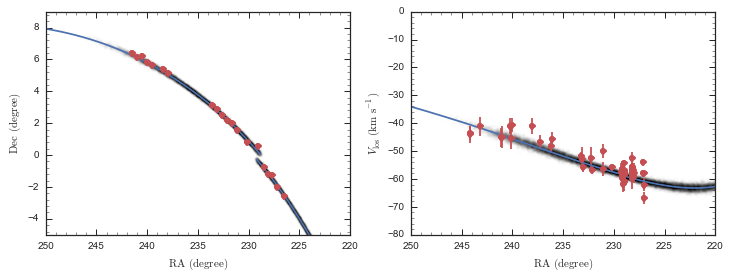

In [7]:
figsize(12,4)
subplot(1,2,1)
bovy_plot.bovy_plot(trackRADec_trailing[:,0],
                    trackRADec_trailing[:,1],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-5.,9.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$\mathrm{Dec}\,(\mathrm{degree})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRADec_leading[:,0],
                    trackRADec_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
plot(radec_sample_trailing[:,0],radec_sample_trailing[:,1],'k.',
     alpha=0.01,zorder=0)
plot(radec_sample_leading[:,0],radec_sample_leading[:,1],'k.',
     alpha=0.01,zorder=0)
errorbar(pos_radec[:,0],pos_radec[:,1],yerr=pos_radec[:,2],
        ls='none',marker='o',color=sns.color_palette()[2])
subplot(1,2,2)
bovy_plot.bovy_plot(trackRADec_trailing[:,0],
                    sdf_trailing._interpolatedObsTrackLB[:,3],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-80.,0.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$V_{\mathrm{los}}\,(\mathrm{km\,s}^{-1})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRADec_leading[:,0],
                    sdf_leading._interpolatedObsTrackLB[:,3],
                    color=sns.color_palette()[0],
                    overplot=True)
plot(radec_sample_trailing[:,0],lb_sample_trailing[3],'k.',
     alpha=0.01,zorder=0)
plot(radec_sample_leading[:,0],lb_sample_leading[3],'k.',
     alpha=0.01,zorder=0)
errorbar(rvel_ra[:,0],rvel_ra[:,1],yerr=rvel_ra[:,2],
        ls='none',marker='o',color=sns.color_palette()[2])

In [8]:
print "Physical length: %f kpc (leading,trailing)=(%f,%f) kpc" % \
    (sdf_leading.length(phys=True)+sdf_trailing.length(phys=True),
     sdf_leading.length(phys=True),sdf_trailing.length(phys=True))
print "Angular length: %f deg (leading,trailing)=(%f,%f) deg" % \
    (sdf_leading.length(ang=True)+sdf_trailing.length(ang=True),
     sdf_leading.length(ang=True),sdf_trailing.length(ang=True))

Physical length: 14.886392 kpc (leading,trailing)=(8.323327,6.563065) kpc
Angular length: 45.531331 deg (leading,trailing)=(25.719866,19.811466) deg


Also in $(\xi,\eta)$ coordinates

In [9]:
xieta_sample_trailing= pal5_util.radec_to_pal5xieta(radec_sample_trailing[:,0],
                                                   radec_sample_trailing[:,1],
                                                   degree=True)
xieta_sample_leading= pal5_util.radec_to_pal5xieta(radec_sample_leading[:,0],
                                                  radec_sample_leading[:,1],
                                                  degree=True)
trackxieta_trailing=\
  pal5_util.radec_to_pal5xieta(trackRADec_trailing[:,0],
                    trackRADec_trailing[:,1],degree=True)
trackxieta_leading=\
  pal5_util.radec_to_pal5xieta(trackRADec_leading[:,0],
                    trackRADec_leading[:,1],degree=True)
pos_xieta= pal5_util.radec_to_pal5xieta(pos_radec[:,0],pos_radec[:,1],
                                        degree=True)

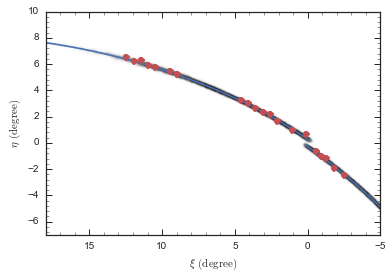

In [10]:
figsize(6,4)
bovy_plot.bovy_plot(trackxieta_trailing[:,0],
                    trackxieta_trailing[:,1],
                    color=sns.color_palette()[0],
                    xrange=[18.,-5.],
                    yrange=[-7.,10.],
                    xlabel=r'$\xi\,(\mathrm{degree})$',
                    ylabel=r'$\eta\,(\mathrm{degree})$')
bovy_plot.bovy_plot(trackxieta_leading[:,0],
                    trackxieta_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
plot(xieta_sample_trailing[:,0],xieta_sample_trailing[:,1],'k.',
     alpha=0.01,zorder=0)
plot(xieta_sample_leading[:,0],xieta_sample_leading[:,1],'k.',
     alpha=0.01,zorder=0)
plot(pos_xieta[:,0],pos_xieta[:,1],
        ls='none',marker='o',color=sns.color_palette()[2])

Density in $(\xi,\eta)$ coordinates:

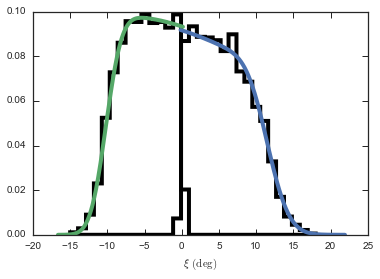

In [11]:
dens_xi= numpy.array([sdf_trailing.density_par(x,coord='customra') for x in sdf_trailing._interpolatedThetasTrack])
plot(trackxieta_trailing[:,0],
     dens_xi/numpy.sum(dens_xi*(
     numpy.roll(trackxieta_trailing[:,0],-1)-trackxieta_trailing[:,0])),lw=4.)
dum= hist(xieta_sample_trailing[:,0],range=[-15.,18.],bins=31,normed=True,histtype='step',lw=4.,color='k')
dens_xi= numpy.array([sdf_leading.density_par(x,coord='customra') for x in sdf_leading._interpolatedThetasTrack])
plot(trackxieta_leading[:,0],
     -dens_xi/numpy.sum(dens_xi*(
     numpy.roll(trackxieta_leading[:,0],-1)-trackxieta_leading[:,0])),lw=4.)
dum= hist(xieta_sample_leading[:,0],range=[-15.,18.],bins=31,normed=True,histtype='step',lw=4.,color='k')
xlabel(r'$\xi\,(\mathrm{deg})$')